<a href="https://colab.research.google.com/github/shubhangigujar/Data-Science/blob/main/multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance (1).csv to predictive_maintenance (1).csv


In [9]:
df=pd.read_csv('predictive_maintenance (1).csv')


In [10]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [11]:
df.shape

(10000, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [13]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [14]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [15]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [16]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [17]:
pd.crosstab(index = df['Type'],columns = df['Failure Type'],dropna = True,normalize = 'columns',margins = True)

Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,All
Type,,,,,,,
H,0.071429,0.101430,0.012821,0.052632,0.222222,0.133333,0.1003
L,0.660714,0.596457,0.935897,0.621053,0.666667,0.555556,0.6000
M,0.267857,0.302114,0.051282,0.326316,0.111111,0.311111,0.2997


In [18]:
pd.crosstab(index = df['Type'],columns = df['Failure Type'],dropna = True,normalize = 'index',margins= True)

Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Type,,,,,,
H,0.007976,0.976072,0.000997,0.004985,0.003988,0.005982
L,0.012333,0.959500,0.012167,0.009833,0.002000,0.004167
M,0.010010,0.972973,0.001335,0.010344,0.000667,0.004671
All,0.011200,0.965200,0.007800,0.009500,0.001800,0.004500


<ipython-input-19-74c42938877b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap = "RdYlBu")


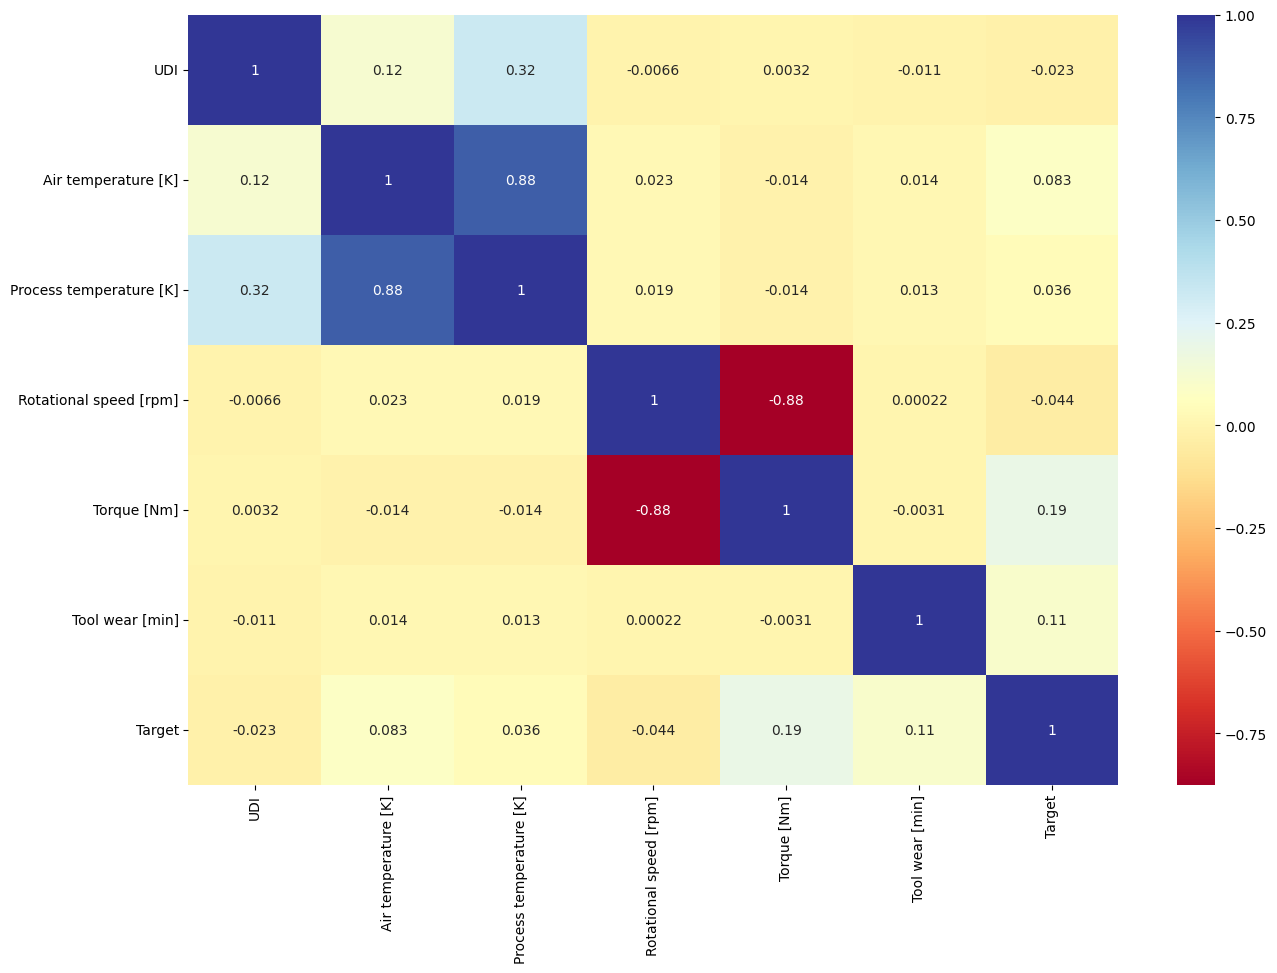

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap = "RdYlBu")
plt.draw()

array([[<Axes: title={'center': 'UDI'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >]],
      dtype=object)

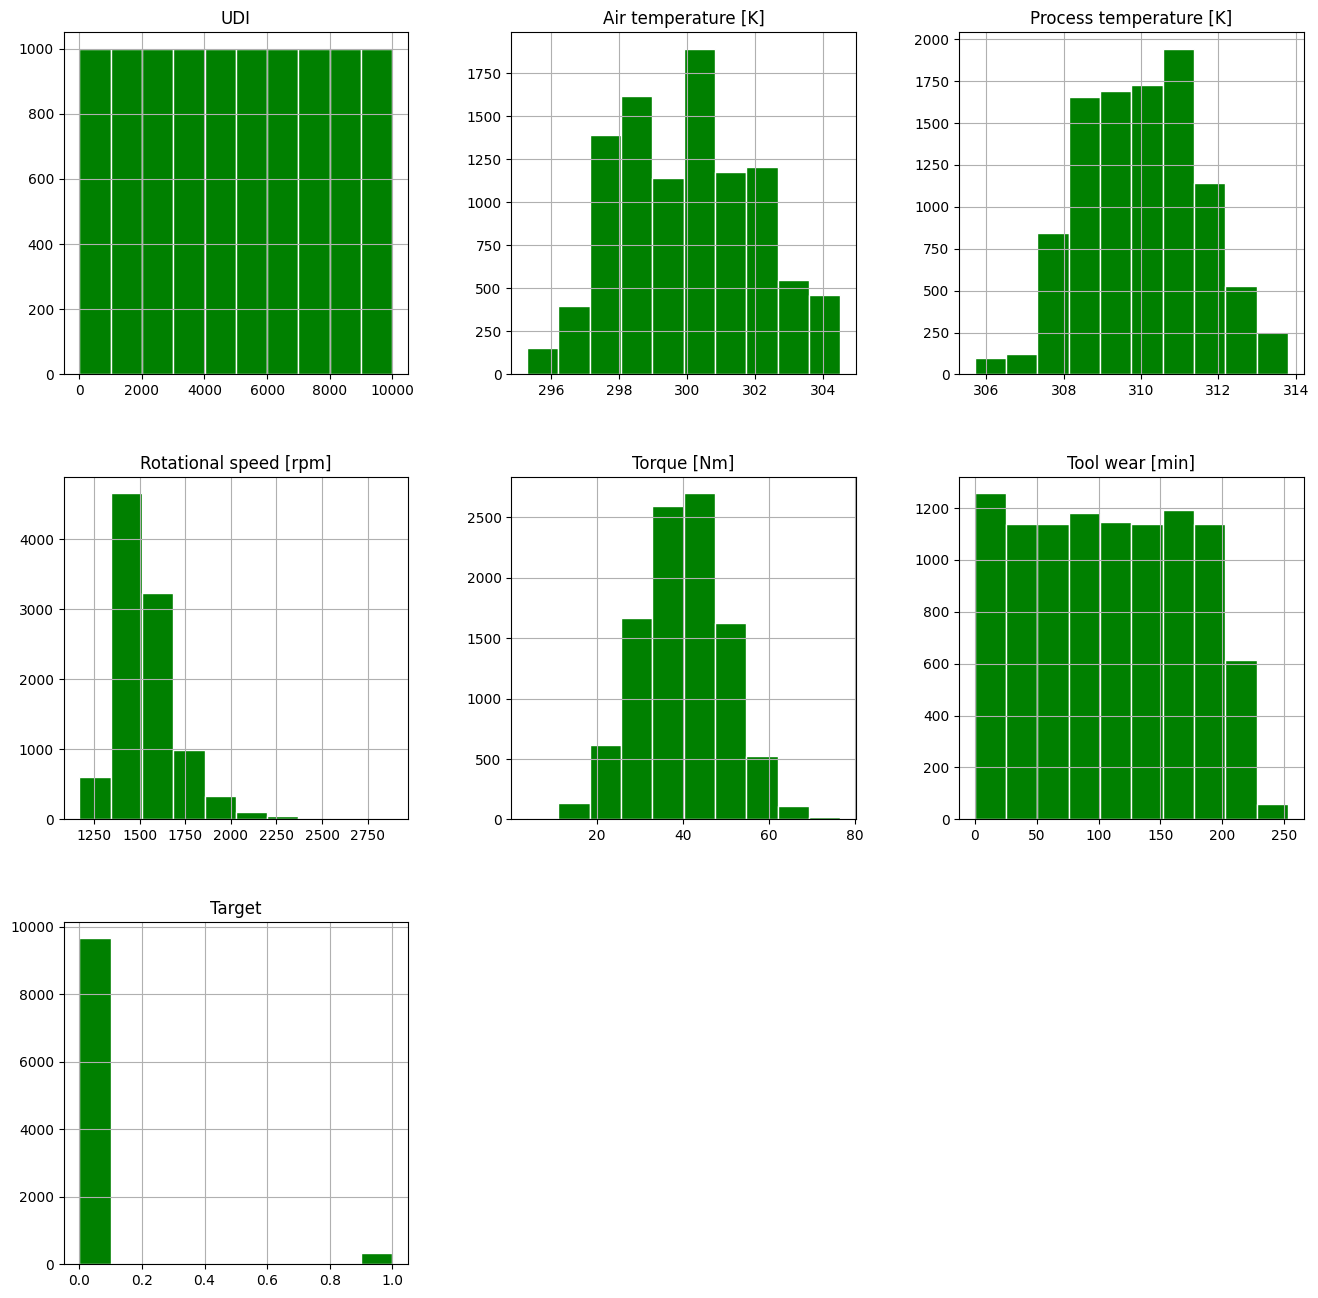

In [20]:
df.hist(figsize=(16, 16),color = 'green',edgecolor = 'white',bins = 10)

<Axes: xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

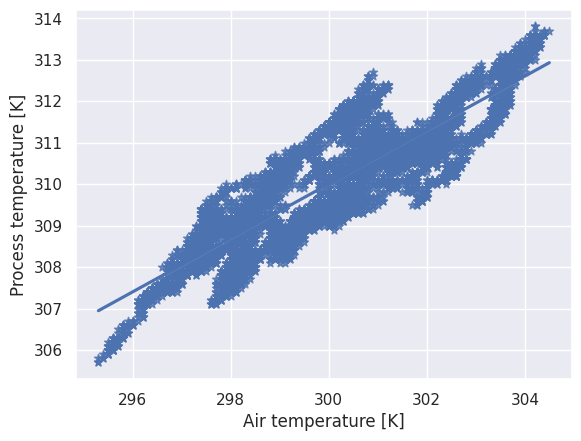

In [21]:
sns.set(style ="darkgrid")
sns.regplot(x = df["Air temperature [K]"],y = df["Process temperature [K]"],fit_reg = True,marker = "*")

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

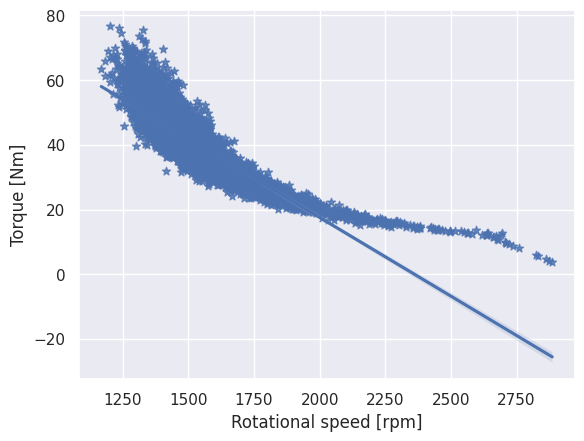

In [22]:
sns.set(style ="darkgrid")
sns.regplot(x = df["Rotational speed [rpm]"],y = df["Torque [Nm]"],fit_reg = True,marker = "*")

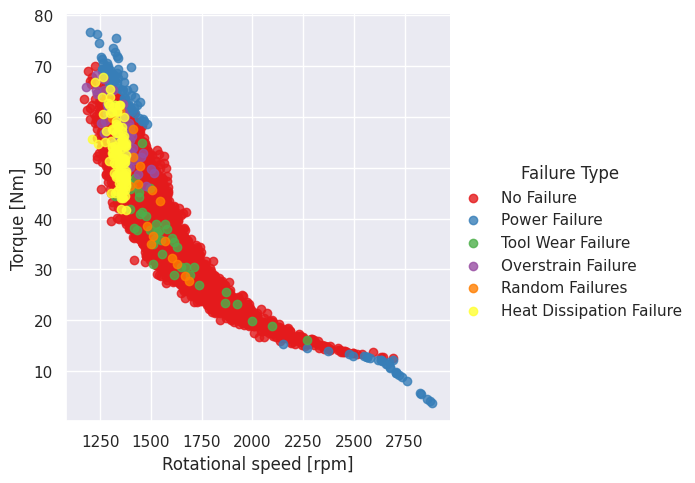

In [23]:
sns.lmplot(x="Rotational speed [rpm]",y ="Torque [Nm]",data = df,fit_reg= False ,hue = 'Failure Type',legend = True,palette = "Set1" )

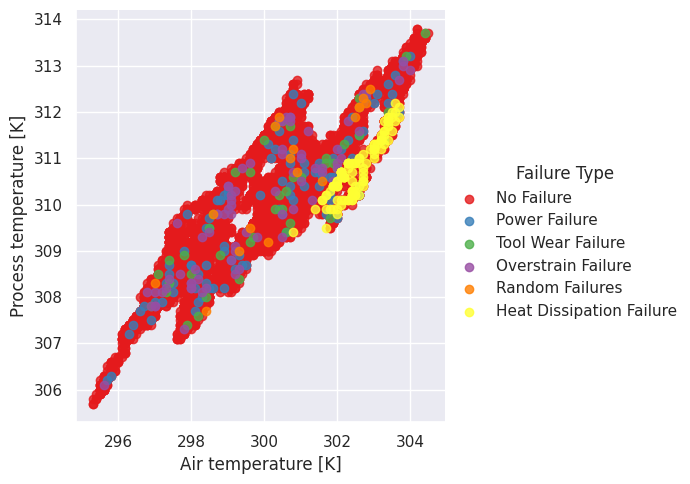

In [25]:
sns.lmplot(x="Air temperature [K]",y ="Process temperature [K]",data = df,fit_reg= False ,hue = 'Failure Type',legend = True,palette = "Set1" )

In [26]:
df["Failure Type"].replace({"No Failure": 0,"Heat Dissipation Failure": 1,"Power Failure": 2,"Overstrain Failure": 3,"Tool Wear Failure": 4,"Random Failures": 5},inplace=True)

In [27]:
df["Type"].replace({"H":0,"L":1,"M":2}, inplace=True)

In [28]:
col_name=df.columns.to_list()
col_name

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']

In [29]:
predictive_columns = col_name[2:6]
X = df[predictive_columns]
y = df["Failure Type"]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=40, test_size=0.33)

In [31]:
X_test.shape

(3300, 4)